In [1]:
import cv2
import numpy as np
import pytesseract
from pdf2image import convert_from_path
from pytesseract import Output
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"C:\\Users\\rushi.bagul\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe"
# Path to Poppler (needed for pdf2image on Windows)
poppler_path = r"C:\\Users\\rushi.bagul\\Documents\\Langgraph-tutorial-leraning\\poppler\\Release-24.08.0-0\\poppler-24.08.0\\Library\\bin"

In [51]:
import os

pdf_path = r"..\\pdf\\output.pdf"

if not os.path.exists(pdf_path):
    print(f"Error: File not found at {pdf_path}")
else:
    print("PDF file exists, proceeding...")

# pdf_path = r"..\\pdf\\output.pdf"
image_path = r"..\\img\\page4.png"
#image_path = r"..\img\\strike_ex2.png"
proccessed_image_path = r"..\\processed_img\\processed_page_1.png"

PDF file exists, proceeding...


In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output

image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to highlight text and lines
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Extract text using Tesseract OCR with bounding box information
ocr_data = pytesseract.image_to_data(image, output_type=Output.DICT)

# Detect horizontal lines (potential strikethroughs)
kernel = np.ones((1, 50), np.uint8)  # Horizontal kernel for line detection
horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours of detected lines
contours, _ = cv2.findContours(horizontal_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Processed image for marking strikethrough words
processed_image = image.copy()

# Iterate through detected text and check for overlapping lines
for i in range(len(ocr_data["text"])):
    if ocr_data["text"][i].strip():  # Ignore empty results
        x, y, w, h = (ocr_data["left"][i], ocr_data["top"][i], 
                      ocr_data["width"][i], ocr_data["height"][i])
        
        for contour in contours:
            x_line, y_line, w_line, h_line = cv2.boundingRect(contour)
            
            # Check if the detected line intersects the text bounding box
            if (y < y_line < y + h) and (x_line < x + w and x_line + w_line > x):
                # Mark the detected strikethrough text
                cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
                print(f"Detected Strikethrough: {ocr_data['text'][i]}")


NameError: name 'image_path' is not defined

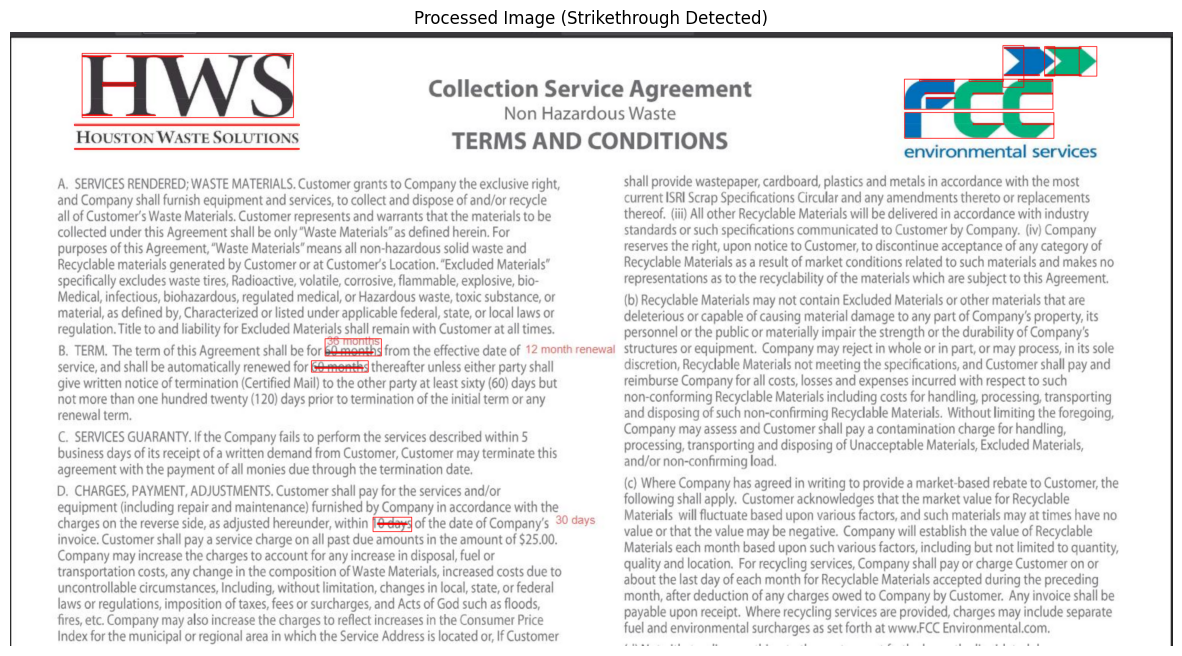

In [57]:

# Display only the processed image
plt.figure(figsize=(15,12))
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (Strikethrough Detected)")
plt.axis("off")
plt.show()
